In [1]:
import numpy as np
import timeit
import sys
import pandas as pd
from typing import NamedTuple, List, Tuple
from IPython.display import display
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import Polygon as ShapelyPolygon

# MCTS code imports
sys.path.append("..")  # Adds higher directory to python modules path.
from main import MeasurementControlEnvironment
from utils import get_ellipse_scaling
from object_manager import ObjectManager, ObjectTuple

In [2]:
obj1 = ObjectTuple(object_type='occlusion',
                   shape='circle',
                   mean=np.array([50, 45]),
                   radius=5.0
)

obj2 = ObjectTuple(object_type='obstacle',
                   shape='4polygon',
                   mean=np.array([10, 10]),
                   points=np.array([[10, 10],[14, 10], [14, 14], [10, 14]])
)

obj3 = ObjectTuple(object_type='occlusion',
                   shape='circle',
                   mean=np.array([40, 40]),
                   radius=1.0
)

obj4 = ObjectTuple(object_type='occlusion',
                   shape='4polygon',
                   mean=np.array([30, 30]),
                   points=np.array([[30, 30],[34, 30], [34, 34], [30, 34]])
)

obj5 = ObjectTuple(object_type='ooi',
                   shape='4polygon',
                   mean=np.array([62, 62]),
                   ooi_id=0,
                   points=np.array([[60, 60],[64, 60], [64, 64], [60, 64]]),
                   covariances=[np.diag([3.5, 2.5]),
                                np.diag([3.5, 2.5]),
                                np.diag([3.5, 2.5]),
                                np.diag([3.5, 2.5])]
)


df = pd.DataFrame([obj1, obj2, obj3, obj4, obj5])
df.head()

,object_type,shape,mean,ooi_id,points,covariances,radius,observed,in_collision
0,occlusion,circle,"[50, 45]",NaN,None,None,5.0,"[False, False, False, False]",False
1,obstacle,4polygon,"[10, 10]",NaN,"[[10, 10], [14, 10], [14, 14], [10, 14]]",None,NaN,"[False, False, False, False]",False
2,occlusion,circle,"[40, 40]",NaN,None,None,1.0,"[False, False, False, False]",False
3,occlusion,4polygon,"[30, 30]",NaN,"[[30, 30], [34, 30], [34, 34], [30, 34]]",None,NaN,"[False, False, False, False]",False
4,ooi,4polygon,"[62, 62]",0.0,"[[60, 60], [64, 60], [64, 64], [60, 64]]","[[[3.5, 0.0], [0.0, 2.5]], [[3.5, 0.0], [0.0, ...",NaN,"[False, False, False, False]",False


Toy Measurement Control Initialized


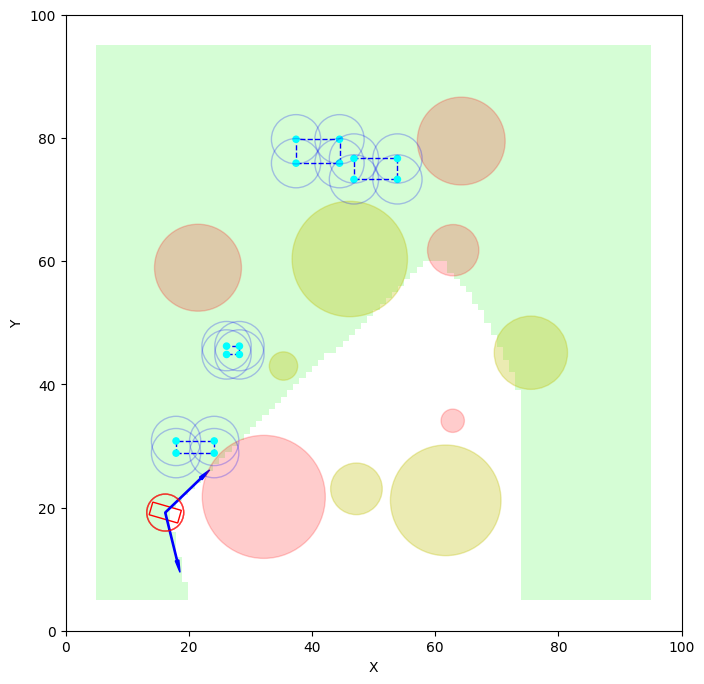

In [3]:
env = MeasurementControlEnvironment()
env.reset()
env.draw_state(env.get_state())

In [4]:
env.object_manager.df.head(20)

,object_type,shape,mean,ooi_id,points,covariances,radius,observed,in_collision
0,obstacle,circle,"[62.91288641110508, 61.773624267380725]",NaN,None,None,4.169147,"[False, False, False, False]",False
1,obstacle,circle,"[64.22064298171111, 79.48955665560142]",NaN,None,None,7.131495,"[False, False, False, False]",False
2,obstacle,circle,"[21.483502314382253, 58.930192559231024]",NaN,None,None,7.060329,"[False, False, False, False]",False
3,obstacle,circle,"[62.83657403809153, 34.08714148336342]",NaN,None,None,1.893315,"[False, False, False, False]",False
4,obstacle,circle,"[32.16696401547265, 21.730102179777493]",NaN,None,None,9.987318,"[False, False, False, False]",False
5,occlusion,circle,"[35.363331798206374, 42.96797333806214]",NaN,None,None,2.301151,"[False, False, False, False]",False
6,occlusion,circle,"[46.12501650130787, 60.34245713002396]",NaN,None,None,9.366350,"[False, False, False, False]",False
7,occlusion,circle,"[47.20698287030597, 23.032500495435215]",NaN,None,None,4.191225,"[False, False, False, False]",False
8,occlusion,circle,"[75.52480802837748, 45.131149349177846]",NaN,None,None,5.947706,"[False, False, False, False]",False
9,occlusion,circle,"[61.700122748393845, 21.165805205663652]",NaN,None,None,8.978129,"[False, False, False, False]",False


In [5]:
# object_manager = ObjectManager(df=object_manager.df, num_obstacles=4, num_occlusion=4, num_oois=3, car_collision_radius=3.0,
#                                  car_sensor_range=40.0, car_max_bearing=np.radians(60), ui=env.ui)
# # display(object_manager.df.head(20))
# car_state = np.array([50, 30, 0, np.radians(90), 0, 0])
# object_manager.reset(car_state=car_state)
# object_manager.draw_objects(car_state=car_state)
# env.car.draw_car_state(car_state)
# start_time = timeit.default_timer()
# df_offending = object_manager.collision_check(car_state=car_state)
# print(f'Collision check took {timeit.default_timer() - start_time:.6f} seconds')
# start_time = timeit.default_timer()
# observations = object_manager.get_observations(car_state=car_state)
# print(f'Observations took {timeit.default_timer() - start_time:.6f} seconds')

# env.ui.plot()
# # print(f'Observations: {observations}')